In [1]:
from torchvision import transforms

import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import torchvision
import torch

import matplotlib.pyplot as plt
import numpy as np

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <F0D48035-EF9E-3141-9F63-566920E60D7C> /Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <44B645FB-F027-3EE5-86D7-DBF8E2FC6264> /Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device = torch.device('mps')

dataset = torchvision.datasets.MNIST('../data/', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=True)

In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),        nn.ReLU(),
            nn.Linear(128, 32),         nn.ReLU(),
            nn.Linear(32, 10),          nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(10, 32),          nn.ReLU(),
            nn.Linear(32, 128),         nn.ReLU(),
            nn.Linear(128, 28 * 28),    nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimzier = optim.Adam(model.parameters(), lr=1e-4)

In [5]:
for epoch in range(101):
    running_loss = 0.0
    for data in trainloader:
        inputs = data[0].to(device).view(-1, 28 * 28)
        optimzier.zero_grad()

        outputs = model(inputs)
        outputs = outputs.view(-1, 1, 28 * 28)

        loss = criterion(inputs, outputs)
        loss.backward()
        optimzier.step()

        running_loss += loss.item()

    cost = running_loss / len(trainloader)
    print("[%d] loss: %.3f" % (epoch + 1, cost))

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([50, 1, 784])) that is different to the input size (torch.Size([50, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1] loss: 0.083
[2] loss: 0.068
[3] loss: 0.068
[4] loss: 0.067
[5] loss: 0.067
[6] loss: 0.067
[7] loss: 0.067
[8] loss: 0.067
[9] loss: 0.067
[10] loss: 0.067
[11] loss: 0.067
[12] loss: 0.067
[13] loss: 0.067
[14] loss: 0.067
[15] loss: 0.067
[16] loss: 0.067
[17] loss: 0.067
[18] loss: 0.067
[19] loss: 0.067
[20] loss: 0.067
[21] loss: 0.067
[22] loss: 0.067
[23] loss: 0.067
[24] loss: 0.067
[25] loss: 0.067
[26] loss: 0.067
[27] loss: 0.067
[28] loss: 0.067
[29] loss: 0.067
[30] loss: 0.067
[31] loss: 0.067
[32] loss: 0.067
[33] loss: 0.067
[34] loss: 0.067
[35] loss: 0.067
[36] loss: 0.067
[37] loss: 0.067
[38] loss: 0.067
[39] loss: 0.067
[40] loss: 0.067
[41] loss: 0.067
[42] loss: 0.067
[43] loss: 0.067
[44] loss: 0.067
[45] loss: 0.067
[46] loss: 0.067
[47] loss: 0.067
[48] loss: 0.067
[49] loss: 0.067
[50] loss: 0.067
[51] loss: 0.067
[52] loss: 0.067
[53] loss: 0.067
[54] loss: 0.067
[55] loss: 0.067
[56] loss: 0.067
[57] loss: 0.067
[58] loss: 0.067
[59] loss: 0.067
[60] l

In [6]:
outputs.shape

torch.Size([50, 1, 784])

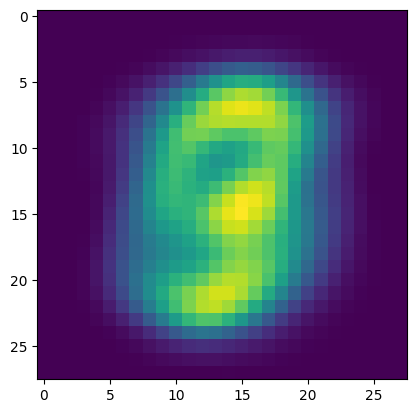

In [7]:
plt.imshow(
    outputs[-1].view(28, 28).to(torch.device('cpu')).detach().numpy()
)